In [1]:
import pandas as pd
import numpy as np

In [2]:
survey = pd.read_csv('ACME-HappinessSurvey2020.csv')

In [3]:
df = survey.copy()

In [4]:
#Data Description:
#Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
#X1 = my order was delivered on time
#X2 = contents of my order was as I expected
#X3 = I ordered everything I wanted to order
#X4 = I paid a good price for my order
#X5 = I am satisfied with my courier
#X6 = the app makes ordering easy for me

#### Rename Columns For Better Understanding
Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
X1 = my order was delivered on time
X2 = contents of my order was as I expected
X3 = I ordered everything I wanted to order
X4 = I paid a good price for my order
X5 = I am satisfied with my courier
X6 = the app makes ordering easy for me

In [5]:

df = df.rename(columns = {'Y': 'happy', 'X1': 'on_time','X2':'expectation','X3':'ordered_all',
                          'X4':'good_price','X5':'courier_satisfaction','X6':'easy_app'})


In [6]:
df2 = df.copy()

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
happy,126.0,0.547619,0.499714,0.0,0.0,1.0,1.0,1.0
on_time,126.0,4.333333,0.800000,1.0,4.0,5.0,5.0,5.0
expectation,126.0,2.531746,1.114892,1.0,2.0,3.0,3.0,5.0
ordered_all,126.0,3.309524,1.023440,1.0,3.0,3.0,4.0,5.0
good_price,126.0,3.746032,0.875776,1.0,3.0,4.0,4.0,5.0
courier_satisfaction,126.0,3.650794,1.147641,1.0,3.0,4.0,4.0,5.0
easy_app,126.0,4.253968,0.809311,1.0,4.0,4.0,5.0,5.0


##### Checking for missing values

In [8]:
df.isnull().sum()

happy                   0
on_time                 0
expectation             0
ordered_all             0
good_price              0
courier_satisfaction    0
easy_app                0
dtype: int64

In [9]:
df.head(5)

,happy,on_time,expectation,ordered_all,good_price,courier_satisfaction,easy_app
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [10]:
X = df.iloc[:,1:]
X

,on_time,expectation,ordered_all,good_price,courier_satisfaction,easy_app
0,3,3,3,4,2,4
1,3,2,3,5,4,3
2,5,3,3,3,3,5
3,5,4,3,3,3,5
4,5,4,3,3,3,5
...,...,...,...,...,...,...
121,5,2,3,4,4,3
122,5,2,3,4,2,5
123,5,3,3,4,4,5
124,4,3,3,4,4,5


In [11]:
y = df.happy
y

0      0
1      0
2      1
3      0
4      0
      ..
121    1
122    1
123    1
124    0
125    0
Name: happy, Length: 126, dtype: int64

### Feature Scaling - Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df.iloc[:,1:] = sc.fit_transform(df.iloc[:,1:])
df.head()

,happy,on_time,expectation,ordered_all,good_price,courier_satisfaction,easy_app
0,0,-1.67332,0.421676,-0.303642,0.291150,-1.444166,-0.315061
1,0,-1.67332,-0.478852,-0.303642,1.437552,0.305497,-1.555612
2,1,0.83666,0.421676,-0.303642,-0.855253,-0.569335,0.925491
3,0,0.83666,1.322205,-0.303642,-0.855253,-0.569335,0.925491
4,0,0.83666,1.322205,-0.303642,-0.855253,-0.569335,0.925491


We scaled our data by StandardScaler because we'll use Classification Methods. Standard Scaler is giving better performance for classification problems

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.08, random_state=34)

## RANDOM FOREST

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [15]:
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

### Train and Test Set Accuracy 

In [16]:
rf_pred_train = rf_model.predict(X_train)
accuracy_score(y_train,rf_pred_train)

0.9478260869565217

In [17]:
rf_pred_test = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test,rf_pred_test)

In [18]:
rf_acc

0.8181818181818182

## KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train,y_train)

### Train and Test Set Accuracy

In [20]:
knn.score(X_train,y_train)

0.6521739130434783

In [21]:
knn_pred = knn.predict(X_test)

In [22]:
knn_acc = accuracy_score(y_test,knn_pred)

In [23]:
knn_acc

0.9090909090909091

We can see the Random forest algorithm has better train accuracy but lower test accuracy, so i tried to get high test accuracy with KNN. KNN has better test accuracy but the train set accuracy is much less than Random forest

### You can predict your own value with knn or random forest algorithm

For KNN

In [ ]:
knn.predict([[ , , , , ,]]) # Put your values between commas

In [ ]:
rf_model.predict([[ , , , , ,]]) # Put your values between commas

### Question Correlations

In [24]:
import seaborn as sns

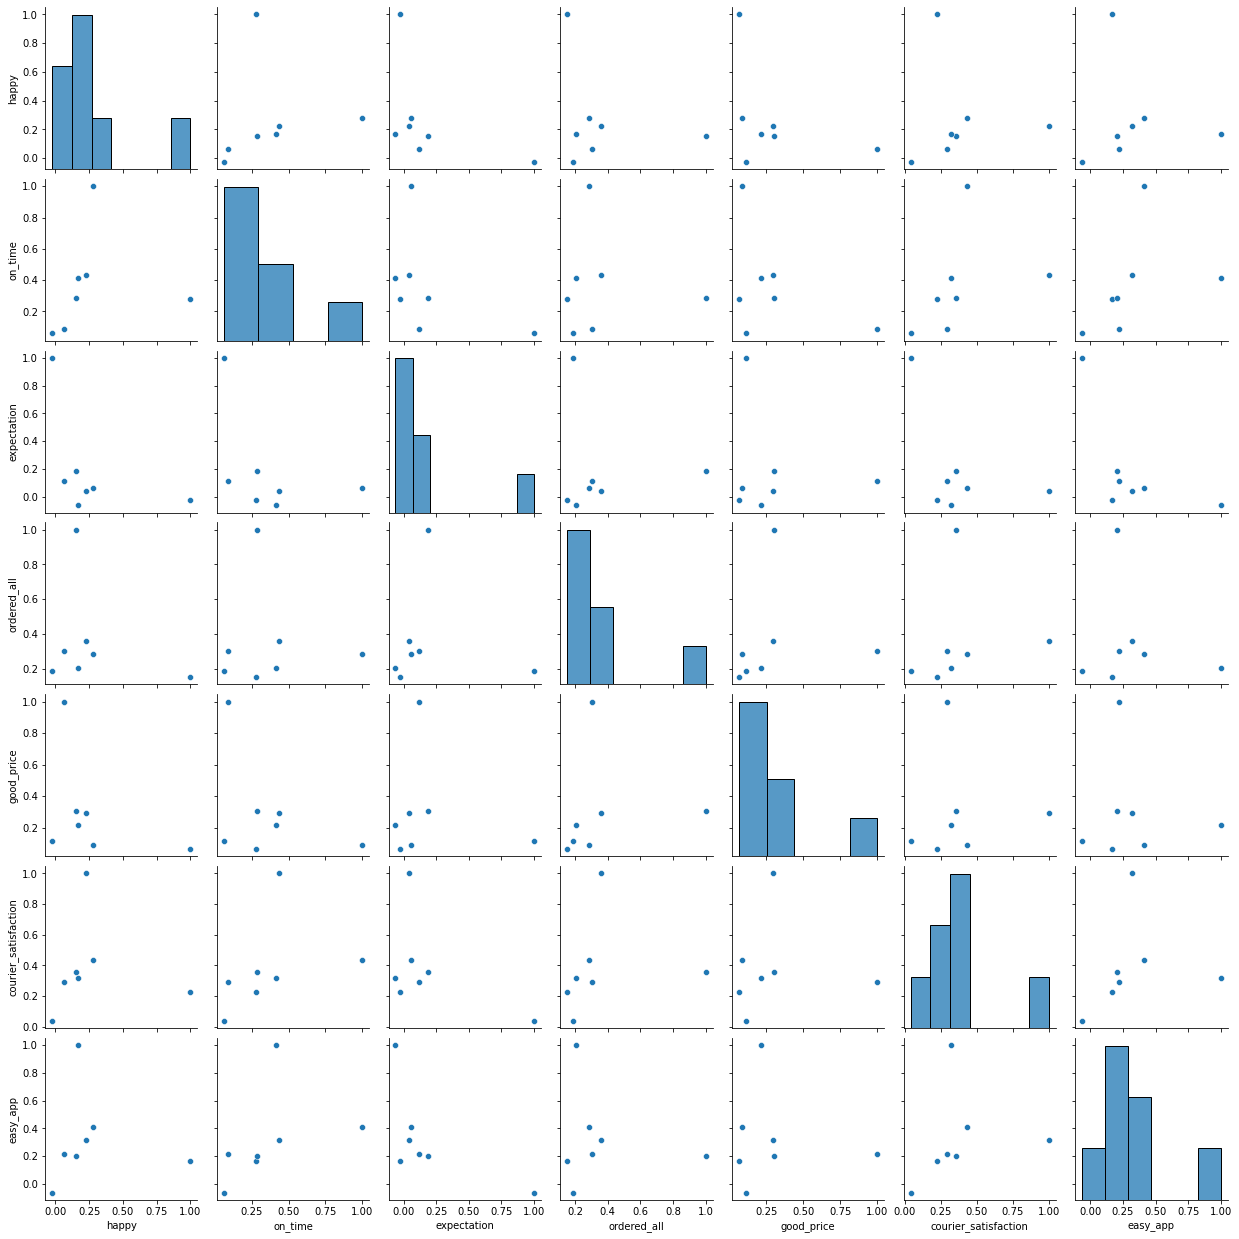

In [25]:
sns.pairplot(df.corr())

In [26]:
df.corr().iloc[:1,1:]

,on_time,expectation,ordered_all,good_price,courier_satisfaction,easy_app
happy,0.28016,-0.024274,0.150838,0.064415,0.224522,0.167669


 So we can see relations. You can delete expectation question on your survey. It has negative correlation with our dependent. order time
 and courier satisfaction is important.